In [9]:
#C: Important imports
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#C: Import the CSV file 
gold_price = pd.read_csv("Gold Price Prediction.csv")

#C: Inspect the dataset
gold_price.head()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
0,8/7/24,2405.87,2384.90,2385.83,NaN,NaN,NaN,30.155078,2414.7450,2368.2948,...,3.0,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,8/6/24,2442.74,2405.87,2384.90,2385.83,0.93,NaN,29.423936,2414.1525,2367.7916,...,3.0,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,8/5/24,2447.17,2442.74,2405.87,2384.90,-20.97,NaN,28.341301,2413.2305,2367.1584,...,3.0,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,8/2/24,2447.23,2447.17,2442.74,2405.87,-36.87,NaN,28.616661,2411.0920,2365.7250,...,3.0,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,8/1/24,2411.09,2447.23,2447.17,2442.74,-4.43,NaN,26.084796,2408.5670,2363.5624,...,3.0,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59


In [75]:
#C: In order to deal with Nan values in some of the columna, I found the average of the columna, rounded it, and replaced them with the average in order to avoid errors
print("Average of the 'Price Tomorrow': " + str(gold_price["Price Tomorrow"].mean()))
gold_price["Price Tomorrow"] = gold_price["Price Tomorrow"].fillna(1958.17)

print("Average of 'Std Dev 10': " +str(gold_price["Std Dev 10"].mean()))
gold_price["Std Dev 10"] = gold_price["Std Dev 10"].fillna(20.99)

Average of the 'Price Tomorrow': 1958.1655999999996
Average of 'Std Dev 10': 20.995735207678997


In [77]:
#C: X labels are the factors, the Y label is what is being predicting
x = gold_price[["Price Tomorrow", "Price 1 Day Prior", "Price 2 Days Prior","Crude", "Monthly Inflation Rate", "Twenty Moving Average","Std Dev 10"]]
y = gold_price["Price Today"]

In [79]:
#C: Training and testing the variables 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lr = LinearRegression()

model = lr.fit(x_train, y_train)

y_predict= lr.predict(x_test)

In [81]:
#C: Checked the accuracy of the Prediction Model and it seems to have a very strong correlation 
print("Test score:")
print(str(round(lr.score(x_test, y_test)*100)) + "%")

Test score:
99%


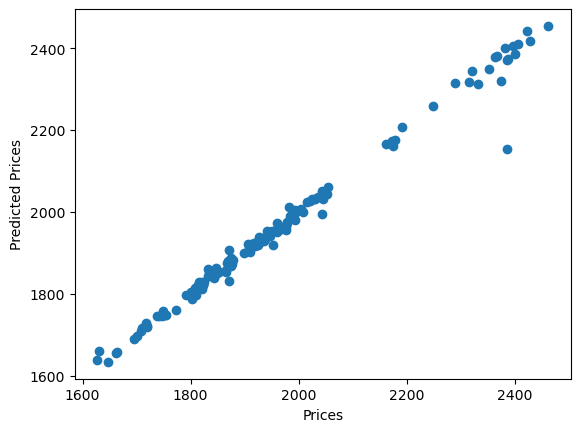

In [83]:
#C: Using the graph, it is easy to see that there is a strong positive correlation
plt.scatter(y_test, y_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.show()